In [1]:
import requests
import re
import json
from urllib import parse
import time
import jieba
from matplotlib import pyplot as plt
from PIL import Image
import wordcloud
%matplotlib inline

In [2]:
def getHtml(url):
    headers = {
        'Cookie': 'pgv_pvid=3918504627; pac_uid=0_fa38b19827a7c; tvfe_boss_uuid=322f64b84f1316ee; AMCV_248F210755B762187F000101%40AdobeOrg=-1891778711%7CMCIDTS%7C18008%7CMCMID%7C73888650160712395190870001653859710530%7CMCAAMLH-1556491252%7C7%7CMCAAMB-1556491252%7CRKhpRz8krg2tLO6pguXWp5olkAcUniQYPHaMWWgdJ3xzPWQmdj0y%7CMCOPTOUT-1555893652s%7CNONE%7CMCAID%7CNONE%7CvVersion%7C2.4.0; eas_sid=J195E5F6S3d9I7o8e0x0u8e6C1; pgv_pvi=6811439104; LW_uid=R1N5A586H6b6N312d2C6K8S2y7; LW_sid=x1i5J6k1z423d7U8K0x088K5Y5; pgv_pvid_new=10001_a15a30a72e; pgv_info=ssid=s2570261392; g_tk=9903965324cc4e41cbc68072c05317837a28fcf2',
        'Host': 'coral.qq.com',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/75.0.3770.80 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    response.encoding = response.apparent_encoding
    return response

In [3]:
baseUrl = 'http://video.coral.qq.com/filmreviewr/c/upcomment/xpu952oo5tr9yzl?'
params = {
#     'commentid':'6559809914289781633',
    'reqnum':137,
    'callback':'jQuery112406943598314197286_1564273436463',
    '_':int(time.time() * 1000)
}
Url = baseUrl + parse.urlencode(params)

In [4]:
def amend(string):
    return re.sub('<.*?>', '', string)

In [5]:
respo = getHtml(Url).text
respos = re.sub(u"\t|\n|\.|-|;|\)|\(|\?|'|", '', ''.join(''.join(respo.split('(')[1:]).split(')')[:-1]))
json_data = json.loads(respos)['data']
total = json_data['total']
comments = [amend(each['content']) for each in json_data['commentid']]

In [6]:
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords

stopwords = stopwordslist('stop_list_CN.txt')

In [7]:
final = []
for single in comments:
#     print(single)
    outer = ''
    word_lists = jieba.lcut(single)
    for each in word_lists:
        if each not in stopwords:
            final.append(each.strip())
final = [each for each in final if len(each) > 0]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Fred\AppData\Local\Temp\jieba.cache
Loading model cost 0.768 seconds.
Prefix dict has been built succesfully.


(-0.5, 297.5, 296.5, -0.5)

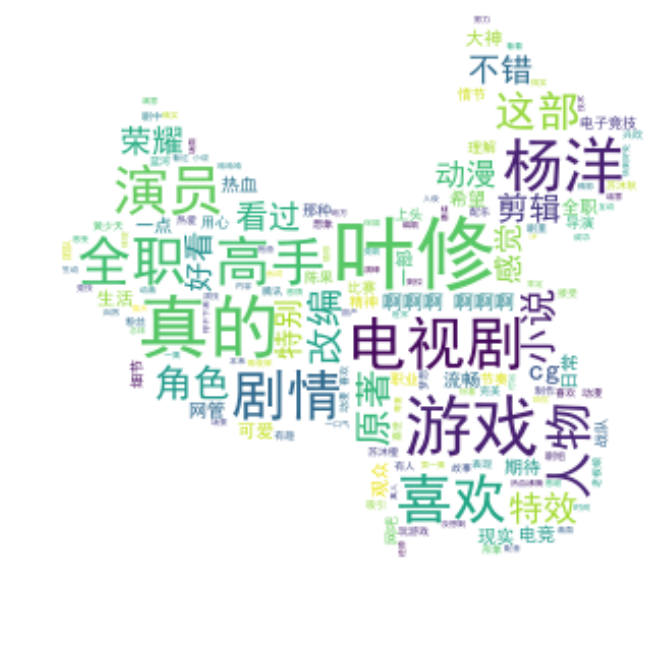

In [8]:
masks = np.array(Image.open('China.png'))
wc = wordcloud.WordCloud(font_path = 'C:/Windows/Fonts/SimHei.ttf', background_color="white", max_words=200,
                max_font_size=40, random_state=42, mask = masks)
wc.generate(' '.join(final))

fig = plt.figure(figsize = (10,8), dpi = 100)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')